In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

try

## Problem 1

#### (a) Closed form

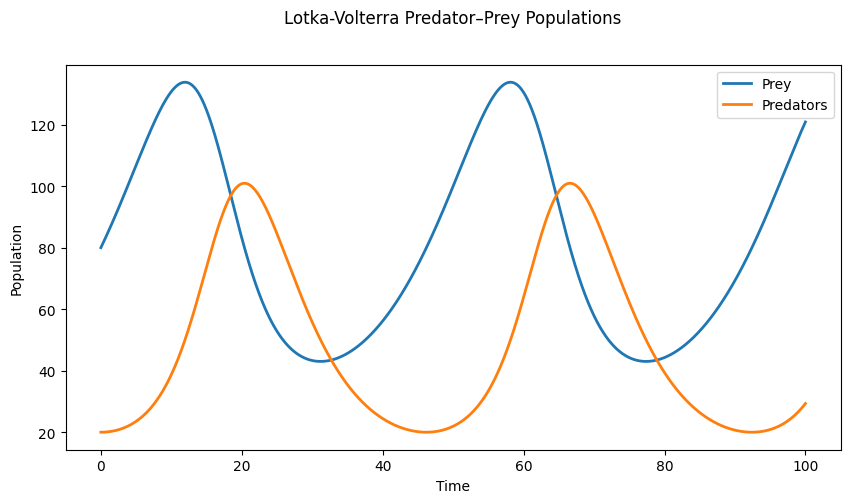

In [ ]:
# Parameters
alpha = 0.1      # prey reproduction rate
beta = 0.002     # predation rate
gamma = 0.2      # predator death rate
delta = 0.0025   # predator growth rate from food

# Settings
dt = 0.0001
t_max = 100
steps = int(t_max / dt)

# Time array
t = np.linspace(0, t_max, steps)

# Arrays for prey (x) and predator (y)
x = np.zeros(steps)
y = np.zeros(steps)

# Initial populations
x[0] = 80   # prey
y[0] = 20   # predators

# Implementing the formula using Euler's method
for i in range(steps - 1):
    x[i+1] = x[i] + dt * (alpha * x[i] - beta * x[i] * y[i])
    y[i+1] = y[i] + dt * (-gamma * y[i] + delta * x[i] * y[i])

# Plotting the 2 graphs
plt.figure(figsize=(10,5))
plt.plot(t, x, label="Prey", linewidth=2)
plt.plot(t, y, label="Predators", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Predator–Prey Populations\n", pad=15)  # extra spacing
plt.legend()
plt.show()

#### (b) Sensiotivity Analysis

The different parameters can lead to several kinds of long-term behavior for the two populations. We have four main possible outcomes:

1. Both populations go extinct: this is the complete collapse scenario. The prey can’t reproduce fast enough to replace what the predators are eating, and the predators also can’t keep themselves alive once the prey get too low. Eventually, both species die off. No bunnies, no foxes.

2.	Predators die out while the prey “escape” and grow without limit: in this case, the predators just aren’t efficient enough—either they don’t reproduce much from eating prey, or their natural death rate is too high. Once the predators disappear, nothing is left to keep the prey population in check, so the prey grow exponentially.

3.	Predator–prey cycles: when there aren’t many predators around, the prey explode in number. With plenty of prey available, the predator population then takes off. But eventually predators become too numerous and over-hunt the prey, so the prey crash. With little food left, the predators crash too. Then the whole pattern repeats. These cycles keep going with almost the same size and timing each round.

4.	Both species stay at fixed, constant levels: this only happens if the system starts exactly at the equilibrium values for prey and predators. If you start anywhere else, even slightly off, the system drifts into the usual oscillations instead. So this “constant” outcome exists in the math, but it’s not something you’d expect to see in the wild. This is a very uinlikly scenario in biology, I guess. It is more a mathematical model.

There’s no situation in the basic Lotka–Volterra model where predators “win.” They depend completely on the prey. If the prey ever reach zero, the predators always follow them into extinction. They are dependet from the preys.

#### (c) Discussion

The two models (SIS and L-V) may seems siumilar, but we have foundamental differences. The key reason we get cycles in predator–prey models but not in the SIS model is how the populations feed back on each other. In the L-V model, predators need prey to reproduce, and prey are only limited by how many predators are chasing them. Each population directly boosts or limits the other: more prey means more predators, but then prey decline and so then predators decline as well, which will give a rebound to prey. This creates an oscillation shifted in the two functions.

In the SIS model, the total population size is fixed, and there’s no “overshoot” process. Once you hit the equilibrium number of infections, nothing pushes the system above or below that point. Instead of oscillating, the system just smoothly approaches a stable steady state. So SIS always settles down; it doesn’t overshoot and cycle.

## Problem 2

#### (a) Implement the simulation

In [15]:
def graphLotkaVolterra(G, x_ratio, y_ratio, alpha, beta, gamma, delta, T):
    """
    G       : networkx graph
    x_ratio : initial proportion of prey
    y_ratio : initial proportion of predators
    alpha   : prey reproduction probability
    beta    : predation probability
    gamma   : predator death probability
    delta   : probability predator replaces eaten prey
    T       : number of timesteps
    """

    nodes = list(G.nodes())
    N = len(nodes)

    # Randomly assign prey, predators, and empty nodes
    random.shuffle(nodes)
    x_n = int(x_ratio * N)
    y_n = int(y_ratio * N)

    state = {}  # node -> "prey", "pred", or "empty"
    for i, n in enumerate(nodes):
        if i < x_n:
            state[n] = "prey"
        elif i < x_n + y_n:
            state[n] = "pred"
        else:
            state[n] = "empty"

    history = []

    # Simulation loop
    for _ in range(T):
        new_state = state.copy()

        # 1. Prey reproduction
        for n in nodes:
            if state[n] == "prey":
                if random.random() < alpha:
                    empty_neighbors = [nbr for nbr in G.neighbors(n)
                                       if state[nbr] == "empty"]
                    if empty_neighbors:
                        baby = random.choice(empty_neighbors)
                        new_state[baby] = "prey"

        # 2. Predation events
        for n in nodes:
            if state[n] == "prey":
                preds = [nbr for nbr in G.neighbors(n)
                         if state[nbr] == "pred"]
                for p in preds:
                    if random.random() < beta:
                        # Prey is eaten
                        if random.random() < delta:
                            new_state[n] = "pred"   # predator reproduction
                        else:
                            new_state[n] = "empty"
                        break  # prey is gone, no more events

        # 3. Predator death
        for n in nodes:
            if state[n] == "pred":
                if random.random() < gamma:
                    new_state[n] = "empty"

        # Update state
        state = new_state.copy()

        # Record populations
        prey_count = sum(s == "prey" for s in state.values())
        pred_count = sum(s == "pred" for s in state.values())
        empty_count = N - prey_count - pred_count

        history.append((prey_count, pred_count, empty_count))

    return history

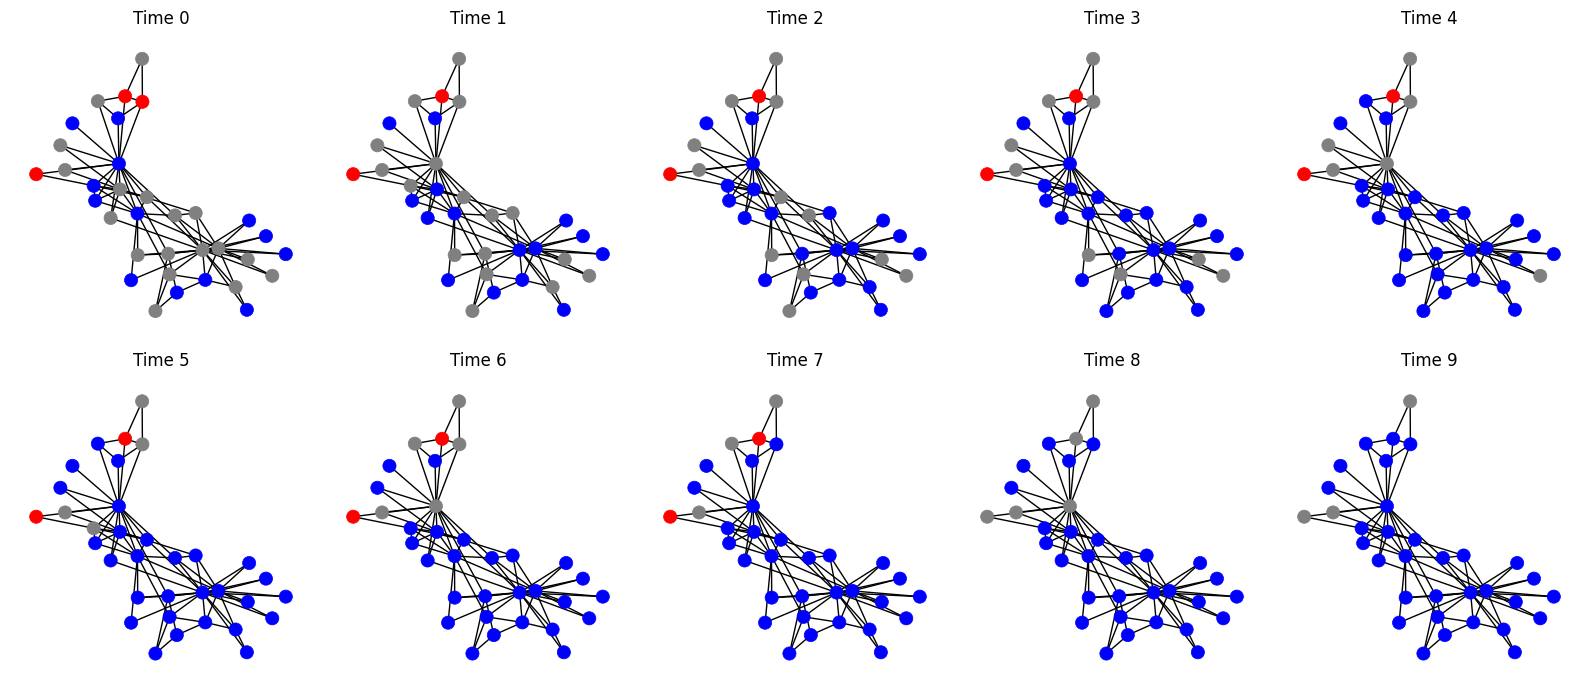

In [16]:
G = nx.karate_club_graph()

state_history = graphLotkaVolterra_states(
    G,
    x_ratio=0.4,
    y_ratio=0.1,
    alpha=0.5,
    beta=0.4,
    gamma=0.2,
    delta=0.3,
    T=9
)

plot_state_grid(G, state_history)